In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


___
___
___

In [6]:
unique_values_count = df['Pregnancies'].nunique()
unique_values_count

17

In [7]:
unique_values = df['Pregnancies'].unique()
unique_values

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [8]:
unique_values_count = df['Outcome'].nunique()
unique_values_count

2

In [9]:
import plotly.express as px


In [10]:
import pandas as pd
import plotly.express as px


count_data = df.groupby(['Pregnancies', 'Outcome']).size().reset_index(name='Count')

# Plot using Plotly
fig = px.bar(count_data, x='Pregnancies', y='Count', color='Outcome', 
             labels={'Pregnancies': 'Number of Pregnancies', 'Count': 'Count', 'Outcome': 'Outcome'},
             title="Bar Chart of Pregnancies vs Outcome")

# Show the plot
fig.show()


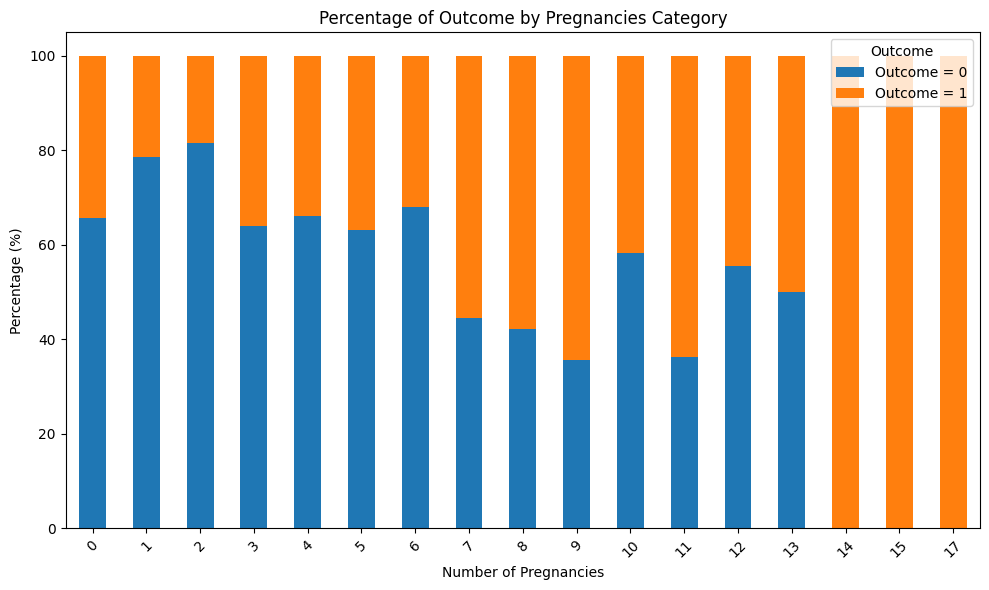

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group by 'Pregnancies' and 'Outcome', then calculate the percentage for each category
outcome_percentages = df.groupby(['Pregnancies', 'Outcome']).size().unstack(fill_value=0)

# Calculate the percentages for each category
outcome_percentages = outcome_percentages.div(outcome_percentages.sum(axis=1), axis=0) * 100

# Plot the result as a stacked bar chart
outcome_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Percentage of Outcome by Pregnancies Category')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Percentage (%)')
plt.legend(title='Outcome', labels=['Outcome = 0', 'Outcome = 1'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
# Group by 'Pregnancies' and 'Outcome', then calculate the count
outcome_counts = df.groupby(['Pregnancies', 'Outcome']).size().reset_index(name='Count')

# Calculate the total counts for each 'Pregnancies' category to compute percentages
total_counts = outcome_counts.groupby('Pregnancies')['Count'].transform('sum')
outcome_counts['Percentage'] = (outcome_counts['Count'] / total_counts) * 100

# Now, plot using Plotly Express
fig = px.bar(
    outcome_counts, 
    x='Pregnancies', 
    y='Percentage', 
    color='Outcome', 
    barmode='stack',  # Stacked bar plot
    labels={'Pregnancies': 'Number of Pregnancies', 'Percentage': 'Percentage (%)', 'Outcome': 'Outcome'},
    title="Percentage of Outcome by Pregnancies Category"
)

# Show the plot
fig.show()


#### 1. Descriptive Statistics

Calculate the frequency of each Outcome (0 and 1) for each Pregnancy category. This helps to see if there's any noticeable trend in how the number of pregnancies affects the outcome.

In [13]:
# Descriptive statistics showing the count of each outcome for each number of pregnancies
contingency_table = pd.crosstab(df['Pregnancies'], df['Outcome'], normalize='index') * 100
print(contingency_table)


Outcome              0           1
Pregnancies                       
0            65.765766   34.234234
1            78.518519   21.481481
2            81.553398   18.446602
3            64.000000   36.000000
4            66.176471   33.823529
5            63.157895   36.842105
6            68.000000   32.000000
7            44.444444   55.555556
8            42.105263   57.894737
9            35.714286   64.285714
10           58.333333   41.666667
11           36.363636   63.636364
12           55.555556   44.444444
13           50.000000   50.000000
14            0.000000  100.000000
15            0.000000  100.000000
17            0.000000  100.000000


#### 2. Chi-Square Test for Independence
To statistically test if there's a significant relationship between Pregnancies and Outcome, you can use the Chi-square test for independence. This test will tell you if the two variables are independent or if there’s a relationship.

In [14]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Pregnancies'], df['Outcome'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Check the result
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 64.59480868723006
P-value: 8.648349123362548e-08


The p-value of $8.648349123362548×10^{−8}$
for a chi-square test indicates that the result is highly statistically significant. In the context of hypothesis testing:

- Since the p-value is smaller than the typical significance threshold (e.g., 0.05 or 0.01), you can reject the null hypothesis, which suggests that there is no relationship between the number of pregnancies and the presence of diabetes.
- This result implies that the number of pregnancies could have a significant effect on the likelihood of developing diabetes in the population you are studying. The chi-square test suggests that the distribution of pregnancies varies significantly between those with and without diabetes.

### 3. Logistic Regression

If Outcome is a binary variable (0 or 1), you can use logistic regression to model the relationship between the number of pregnancies and the outcome. Logistic regression will help you assess how the number of pregnancies influences the likelihood of the outcome being 1 (e.g., success or positive outcome).

In [15]:
import statsmodels.api as sm

# Prepare the data for logistic regression
X = df['Pregnancies']  # Predictor
y = df['Outcome']      # Response

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.622532
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                 0.03752
Time:                        09:30:02   Log-Likelihood:                -478.10
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.026e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1767      0.123     -9.558      0.000      -1.418      -0.935
Pregnancies     0.1372    

### 4. Correlation Analysis
If Pregnancies is treated as a numerical variable, you can calculate the correlation coefficient between Pregnancies and Outcome. This helps to understand the linear relationship between them.

In [16]:
correlation = df['Pregnancies'].corr(df['Outcome'])
print(f"Correlation between Pregnancies and Outcome: {correlation}")


Correlation between Pregnancies and Outcome: 0.22189815303398638


### 5. Visual Exploration
You can also create visualizations to explore the relationship:

Boxplot: To visualize how Pregnancies values are distributed for each Outcome category.

In [17]:
import plotly.express as px

# Boxplot for visualizing the distribution of Pregnancies for each Outcome
fig = px.box(df, x='Outcome', y='Pregnancies', title="Distribution of Pregnancies by Outcome")
fig.show()


In [18]:
fig = px.violin(df, x='Outcome', y='Pregnancies', box=True, points="all", title="Pregnancies Distribution by Outcome")
fig.show()


In [19]:
fig = px.bar(
    outcome_counts, 
    x='Pregnancies', 
    y='Percentage', 
    color='Outcome', 
    barmode='stack', 
    labels={'Pregnancies': 'Number of Pregnancies', 'Percentage': 'Percentage (%)', 'Outcome': 'Outcome'},
    title="Percentage of Outcome by Pregnancies Category"
)
fig.show()


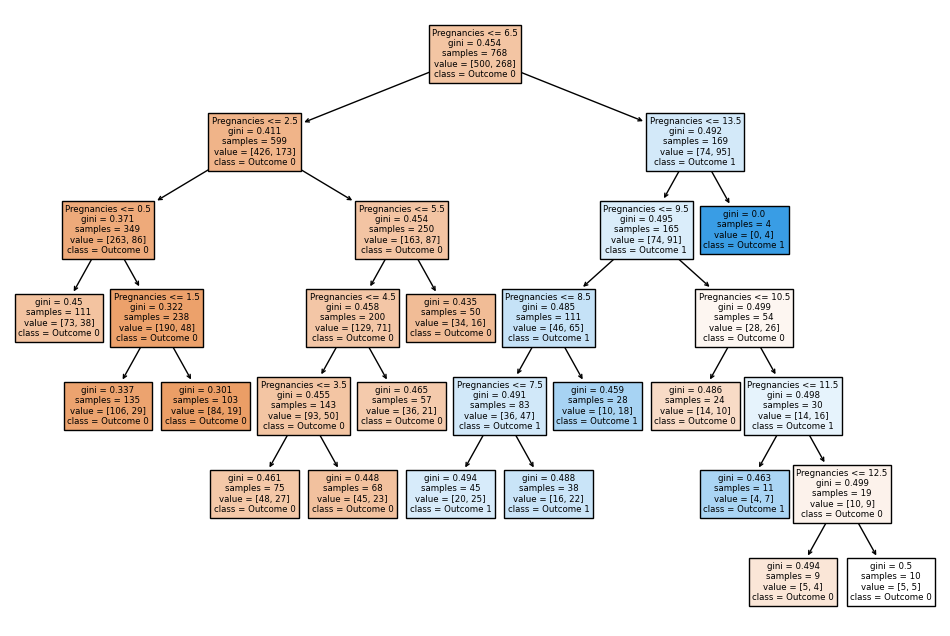

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Prepare the data
X = df[['Pregnancies']]  # Feature (Predictor)
y = df['Outcome']        # Target (Outcome)

# Fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['Pregnancies'], class_names=['Outcome 0', 'Outcome 1'])
plt.show()


___
___
___

In [21]:
df['Glucose'].nunique()

136

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  3.,  9., 20., 41.,
        51., 64., 81., 69., 61., 72., 47., 44., 33., 34., 28., 20., 17.,
        19., 17., 13., 16.]),
 array([  0.        ,   6.63333333,  13.26666667,  19.9       ,
         26.53333333,  33.16666667,  39.8       ,  46.43333333,
         53.06666667,  59.7       ,  66.33333333,  72.96666667,
         79.6       ,  86.23333333,  92.86666667,  99.5       ,
        106.13333333, 112.76666667, 119.4       , 126.03333333,
        132.66666667, 139.3       , 145.93333333, 152.56666667,
        159.2       , 165.83333333, 172.46666667, 179.1       ,
        185.73333333, 192.36666667, 199.        ]),
 <BarContainer object of 30 artists>)

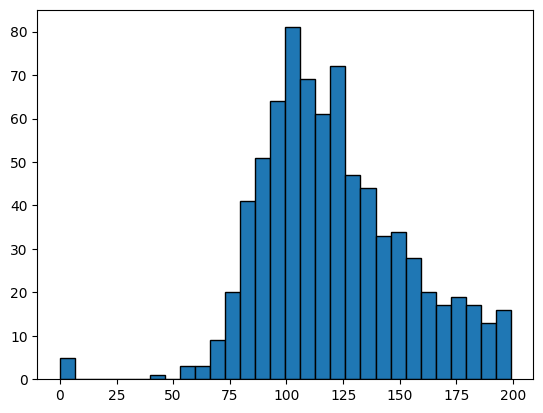

In [22]:
plt.hist(df['Glucose'], bins=30, edgecolor='black')

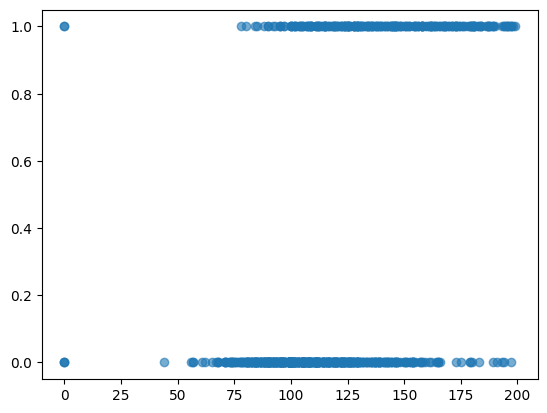

In [23]:
plt.scatter(df['Glucose'], df['Outcome'], alpha=0.6)

<Axes: xlabel='Outcome', ylabel='Glucose'>

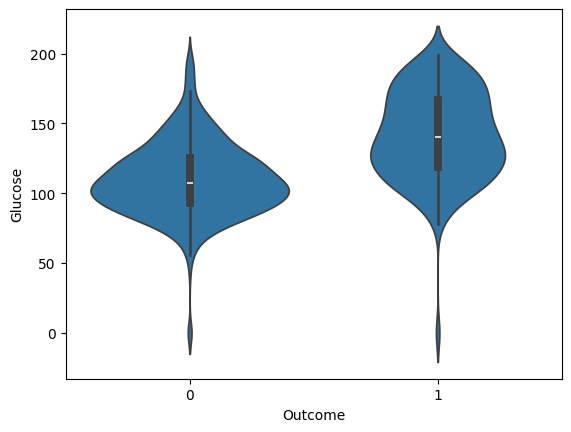

In [24]:
import seaborn as sns
sns.violinplot(x=df['Outcome'], y=df['Glucose'])

In [25]:
import plotly.express as px

# Create the violin plot
fig = px.violin(df, x='Outcome', y='Glucose', box=True, points="all")

# Show the plot
fig.update_layout(
    title="Violin Plot of Glucose vs. OutCome",
    xaxis_title="OutCome",
    yaxis_title="Glucose"
)
fig.show()


### 1. Pearson Correlation (for continuous variables):
Pearson's correlation is used to measure the linear relationship between two continuous variables. However, Outcome is a binary categorical variable (0 or 1), so it’s better to use a point-biserial correlation (a special case of Pearson correlation for binary and continuous variables).

In [26]:
from scipy.stats import pointbiserialr

# Calculate the Point-Biserial correlation between Glucose and Outcome
correlation, p_value = pointbiserialr(df['Outcome'], df['Glucose'])

# Print the correlation and p-value
print(f"Point-Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")


Point-Biserial Correlation: 0.4665813983068734
P-value: 8.935431645291728e-43


In [27]:
# Pearson correlation
pearson_corr = df['Glucose'].corr(df['Outcome'])

# Spearman's rank correlation
spearman_corr = df['Glucose'].corr(df['Outcome'], method='spearman')

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")


Pearson Correlation: 0.46658139830687406
Spearman Correlation: 0.4757763064583268


___
___
___

(array([ 35.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   2.,   4.,
          7.,  24.,  25.,  58.,  85.,  75., 101.,  99.,  85.,  59.,  46.,
         30.,  11.,   6.,   3.,   5.,   3.,   1.,   1.]),
 array([  0.        ,   4.06666667,   8.13333333,  12.2       ,
         16.26666667,  20.33333333,  24.4       ,  28.46666667,
         32.53333333,  36.6       ,  40.66666667,  44.73333333,
         48.8       ,  52.86666667,  56.93333333,  61.        ,
         65.06666667,  69.13333333,  73.2       ,  77.26666667,
         81.33333333,  85.4       ,  89.46666667,  93.53333333,
         97.6       , 101.66666667, 105.73333333, 109.8       ,
        113.86666667, 117.93333333, 122.        ]),
 <BarContainer object of 30 artists>)

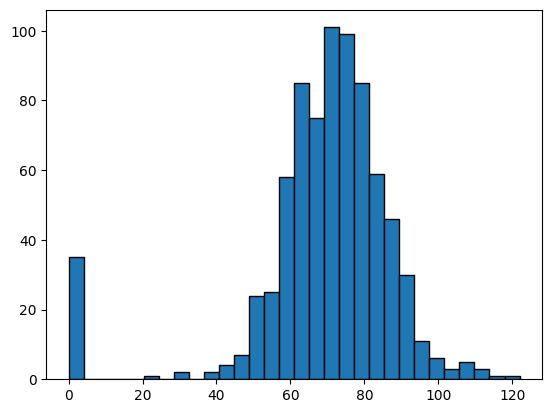

In [28]:
plt.hist(df['BloodPressure'], bins=30, edgecolor='black')

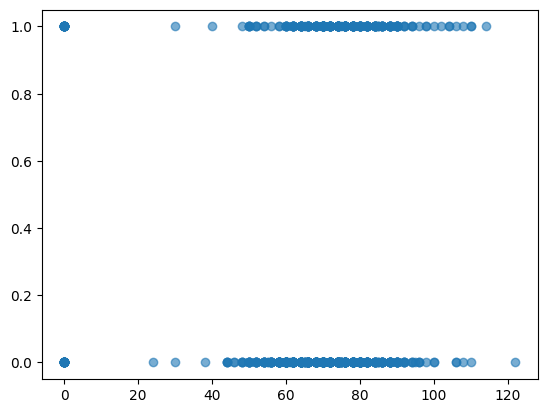

In [29]:
plt.scatter(df['BloodPressure'], df['Outcome'], alpha=0.6)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

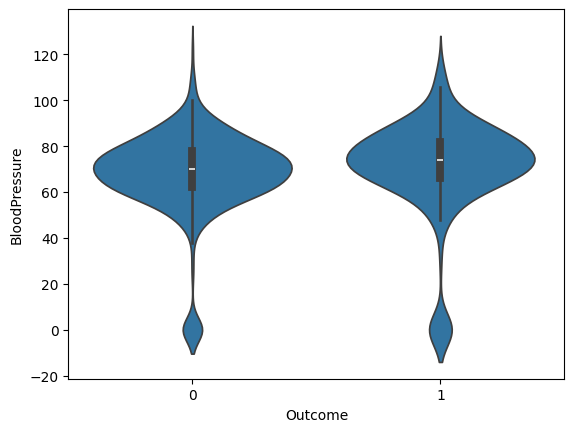

In [30]:
import seaborn as sns
sns.violinplot(x=df['Outcome'], y=df['BloodPressure'])

In [31]:
import plotly.express as px

# Create the violin plot
fig = px.violin(df, x='Outcome', y='BloodPressure', box=True, points="all")

# Show the plot
fig.update_layout(
    title="Violin Plot of Glucose vs. OutCome",
    xaxis_title="OutCome",
    yaxis_title="Bp"
)
fig.show()
import plotly.express as px

# Create the violin plot
fig = px.violin(df, x='Outcome', y='BloodPressure', box=True, points="all")

# Show the plot
fig.update_layout(
    title="Violin Plot of Glucose vs. OutCome",
    xaxis_title="OutCome",
    yaxis_title="bp"
)
fig.show()


### 1. Two-Sample Kolmogorov-Smirnov (KS) Test
The Kolmogorov-Smirnov test is a non-parametric test that compares the cumulative distributions of two datasets. It tests whether the two samples come from the same distribution.

In [32]:
from scipy.stats import ks_2samp

# Separate the BloodPressure data based on Outcome
group_0 = df[df['Outcome'] == 0]['BloodPressure']
group_1 = df[df['Outcome'] == 1]['BloodPressure']

# Perform the KS test
ks_stat, p_value = ks_2samp(group_0, group_1)

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")


KS Statistic: 0.1431044776119403
P-value: 0.0013749491485464131


KS Statistic (0.1431): This value represents the maximum difference between the cumulative distribution functions (CDFs) of the two samples (Outcome = 0 and Outcome = 1). It tells you that the largest gap between the two distributions is approximately 14.31%. This indicates that the two distributions do not perfectly overlap, but it's not an extraordinarily large difference either.

p-value (0.00137): The p-value is very small, much smaller than the commonly used significance threshold of 0.05. This suggests that the difference observed between the two distributions is statistically significant. In other words, it is highly unlikely that the observed difference between the two distributions occurred by chance.

Therefore, you can confidently conclude that the distributions of BloodPressure for Outcome = 0 and Outcome = 1 are significantly different.

### 2. Mann-Whitney U Test (Wilcoxon Rank-Sum Test)
The Mann-Whitney U test is another non-parametric test used to compare the distributions of two independent groups. It tests whether the distributions of two groups are significantly different without assuming a normal distribution.

In [33]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(group_0, group_1)

print(f"U Statistic: {u_stat}")
print(f"P-value: {p_value}")


U Statistic: 55414.5
P-value: 7.5585124602395e-05


The U statistic provides the test statistic, and the p-value tells you whether the distributions are significantly different.
A p-value less than 0.05 suggests that the distributions differ significantly.

- U Statistic (55414.5): This is the test statistic from the Mann-Whitney U test, which compares the ranks of the BloodPressure values between the two groups (Outcome = 0 and Outcome = 1). The U statistic gives a measure of the ranks' separation between the two groups. A large U statistic suggests that there is a notable difference in the ranks of the values between the two groups.

- p-value (7.5585e-05): The p-value is extremely small (much smaller than 0.05), indicating that the difference between the distributions of BloodPressure for Outcome = 0 and Outcome = 1 is statistically significant. This means that it is highly unlikely that the observed difference between the two distributions occurred by chance.

### 4. Shannon Entropy
If you're comparing the shape of the distributions, Shannon entropy can be used as a measure of the uncertainty or disorder in each distribution. If the entropy is significantly different between the two groups, it may indicate that the distributions have different spreads or concentrations.

In [34]:
import numpy as np
from scipy.stats import entropy

# Calculate the probability distributions for both groups (using histogram)
hist_0, bin_edges_0 = np.histogram(group_0, bins=20, density=True)
hist_1, bin_edges_1 = np.histogram(group_1, bins=20, density=True)

# Normalize the histograms
hist_0 = hist_0 / hist_0.sum()
hist_1 = hist_1 / hist_1.sum()

# Calculate entropy
entropy_0 = entropy(hist_0)
entropy_1 = entropy(hist_1)

print(f"Entropy for Outcome 0: {entropy_0}")
print(f"Entropy for Outcome 1: {entropy_1}")


Entropy for Outcome 0: 2.1855815374090075
Entropy for Outcome 1: 2.245633122688368


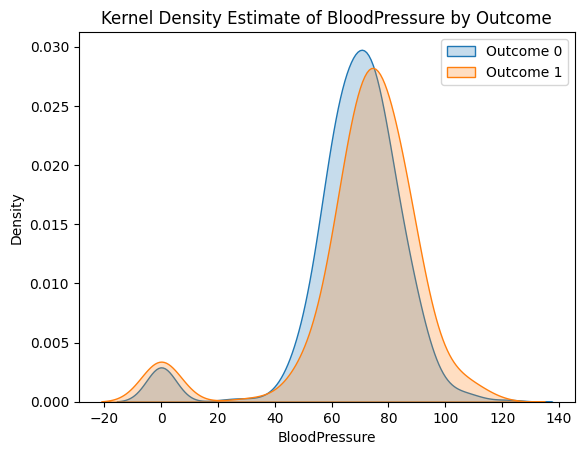

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overlay histograms or density plots
sns.kdeplot(group_0, label='Outcome 0', fill=True)
sns.kdeplot(group_1, label='Outcome 1', fill=True)
plt.title('Kernel Density Estimate of BloodPressure by Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()
plt.show()


___
___
___

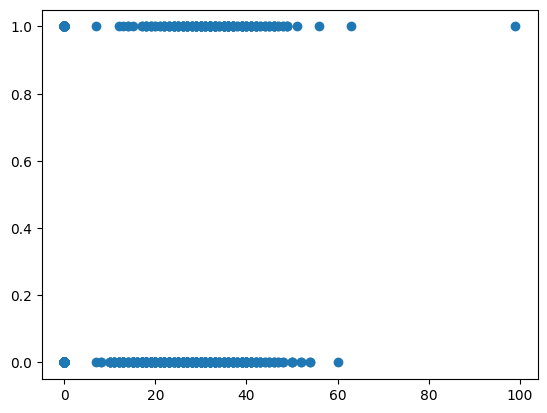

In [39]:
plt.scatter(df['SkinThickness'],df['Outcome'])

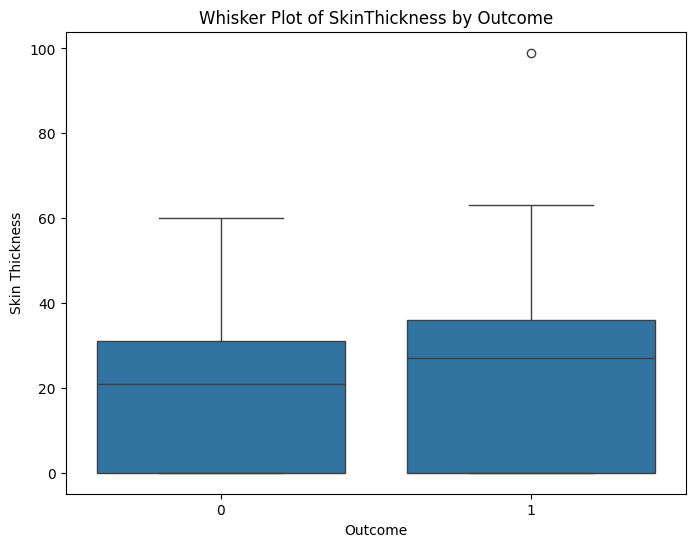

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='SkinThickness')
plt.title('Whisker Plot of SkinThickness by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Skin Thickness')
plt.show()

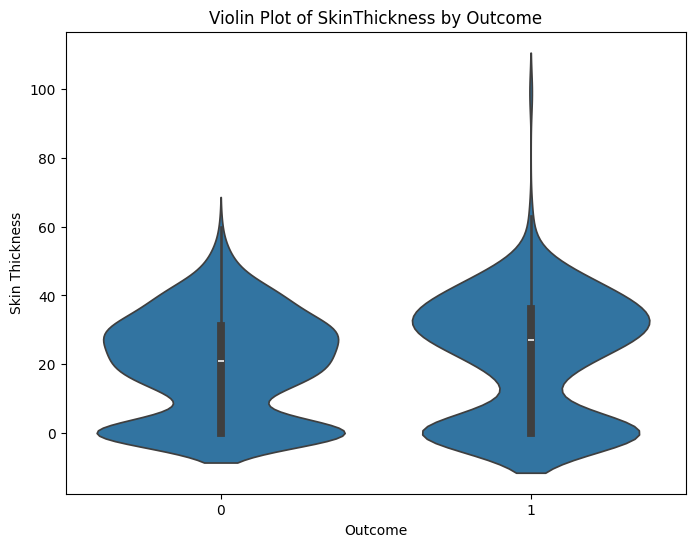

In [41]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Outcome', y='SkinThickness')
plt.title('Violin Plot of SkinThickness by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Skin Thickness')
plt.show()

In [44]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

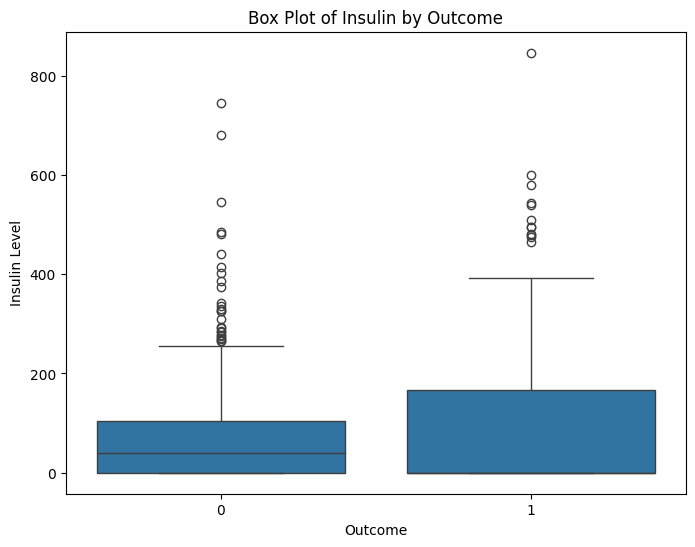

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='Insulin')
plt.title('Box Plot of Insulin by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Insulin Level')
plt.show()

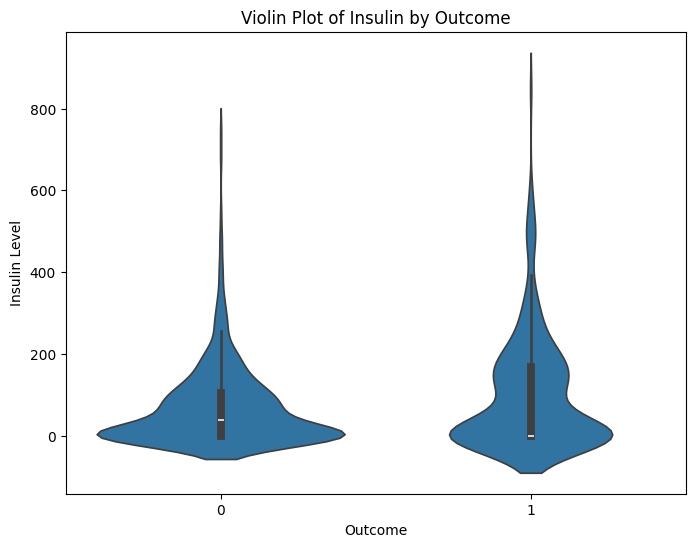

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the columns 'Insulin' and 'Outcome'

# Create a violin plot to show the distribution of 'Insulin' for each 'Outcome' value
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Outcome', y='Insulin')
plt.title('Violin Plot of Insulin by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Insulin Level')
plt.show()


In [47]:
import plotly.express as px

# Assuming 'df' is your DataFrame and it contains the columns 'Insulin' and 'Outcome'

# Create the violin plot
fig = px.violin(df, x="Outcome", y="Insulin", box=True, points="all", 
                title="Violin Plot of Insulin by Outcome", 
                labels={"Outcome": "Outcome", "Insulin": "Insulin Level"})

# Show the plot
fig.show()


DiabetesPedigreeFunction	Age	Outcome

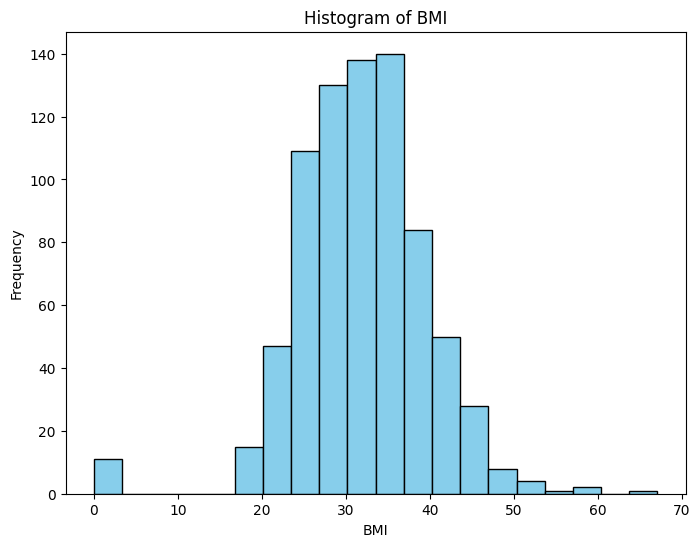

In [48]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the 'BMI' column

plt.figure(figsize=(8, 6))
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


- Normal weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Class 1 (Moderate obesity): BMI between 30 and 34.9
- Class 2 (Severe obesity): BMI between 35 and 39.9
- Class 3 (Very severe or morbid obesity): BMI 40 or higher
- Underweight (BMI < 18.5)

C:\Users\ashik\AppData\Local\Temp\ipykernel_10944\1638665007.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




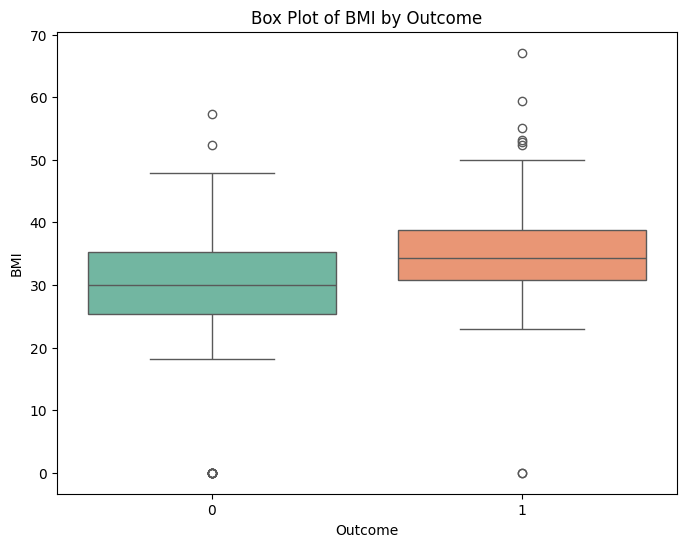

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the 'BMI' and 'Outcome' columns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='BMI', palette='Set2')
plt.title('Box Plot of BMI by Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()


In [51]:
import plotly.express as px

# Assuming 'df' is your DataFrame and it contains 'BMI' and 'Outcome' columns

fig = px.violin(df, x='Outcome', y='BMI', box=True, points="all", 
                title="Violin Plot of BMI by Outcome", 
                labels={'Outcome': 'Diabetes Outcome', 'BMI': 'Body Mass Index'})

# Show the plot
fig.show()


In [52]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

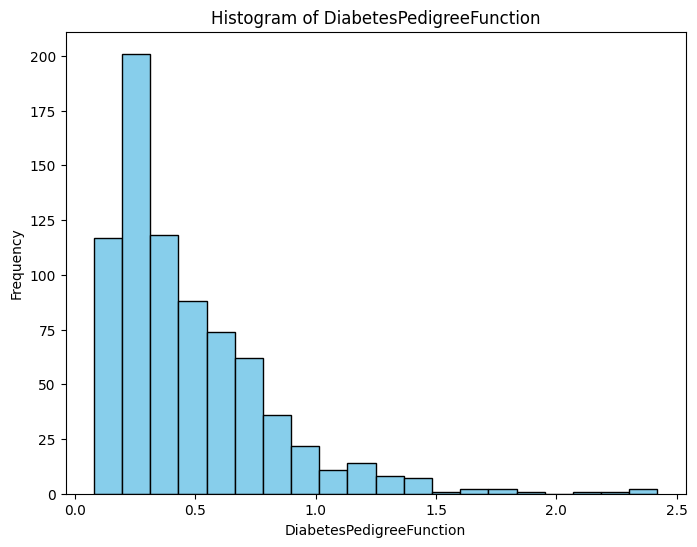

In [54]:

plt.figure(figsize=(8, 6))
plt.hist(df['DiabetesPedigreeFunction'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

In [55]:
import plotly.express as px

# Assuming 'df' is your DataFrame and it contains 'DiabetesPedigreeFunction' and 'Outcome' columns

fig = px.violin(df, x='Outcome', y='DiabetesPedigreeFunction', box=True, points="all", 
                title="Violin Plot of DiabetesPedigreeFunction by Outcome", 
                labels={'Outcome': 'Diabetes Outcome', 'DiabetesPedigreeFunction': 'Diabetes Pedigree Function'})

# Show the plot
fig.show()


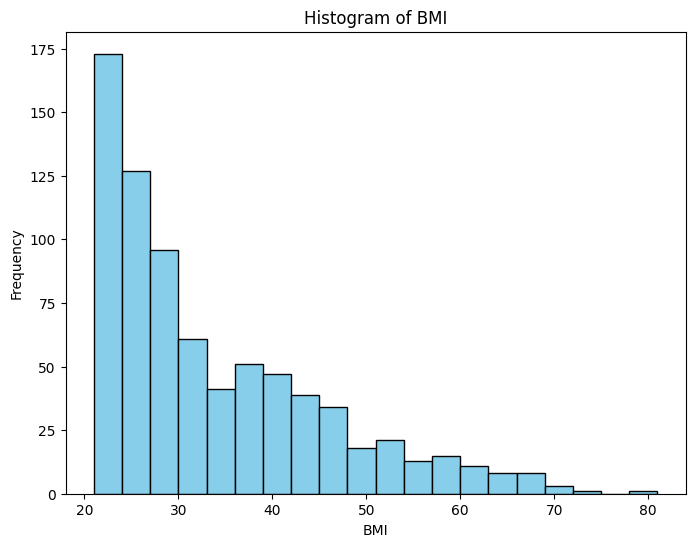

In [56]:
#Age
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the 'BMI' column

plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [57]:
import plotly.express as px

# Assuming 'df' is your DataFrame and it contains 'DiabetesPedigreeFunction' and 'Outcome' columns

fig = px.violin(df, x='Outcome', y='Age', box=True, points="all", 
                title="Violin Plot of DiabetesPedigreeFunction by Outcome", 
                labels={'Outcome': 'Diabetes Outcome', 'DiabetesPedigreeFunction': 'Diabetes Pedigree Function'})

# Show the plot
fig.show()

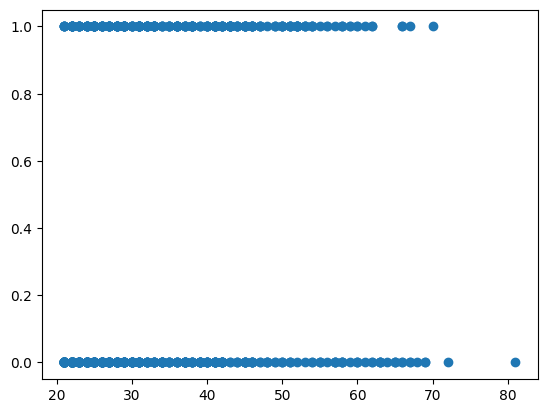

In [58]:
plt.scatter(df['Age'],df['Outcome'])

c:\Users\ashik\codes\krish\diabetes_prediction\diabetes\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



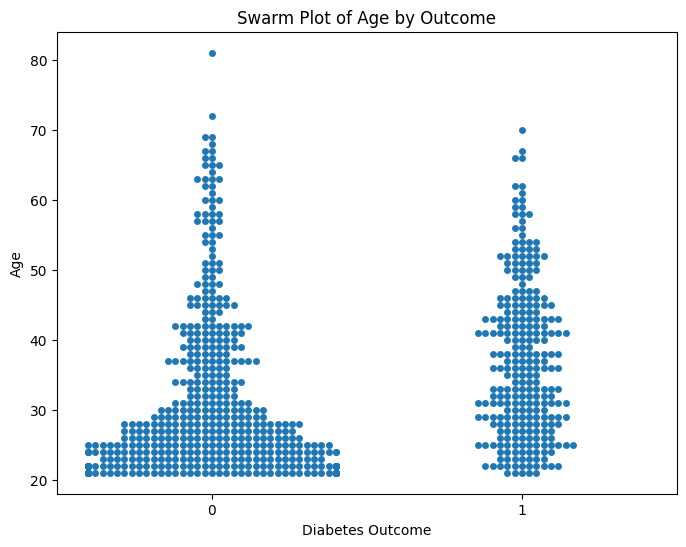

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Age' and 'Outcome' columns

plt.figure(figsize=(8, 6))
sns.swarmplot(x='Outcome', y='Age', data=df)

# Customize the plot
plt.title("Swarm Plot of Age by Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Age")

# Show the plot
plt.show()
